# Test Case 7 - Single Inductance with Voltage and Current Source

In [1]:
from CircuitCalculator.Circuit.solution import transient_solution
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit.Components import components as cmp
import numpy as np
import matplotlib.pyplot as plt

## Setup Circuit

In [2]:
R1, R2, R3 = 10, 20, 30
L = 0.1
V0 = 5
I0 = 1
circuit = Circuit([
    cmp.dc_voltage_source(id='Vs', V=V0, nodes=('1', '0')),
    cmp.resistor(id='R1', R=R1, nodes=('1', '2')),
    cmp.resistor(id='R2', R=R2, nodes=('2', '0')),
    cmp.inductance(id='L', L=L, nodes=('2', '3')),
    cmp.resistor(id='R3', R=R3, nodes=('3', '0')),
    cmp.dc_current_source(id='Is', I=I0, nodes=('0', '3')),
    cmp.ground(nodes=('0',))
])

### Setup Solution

In [3]:
def step(t: np.ndarray) -> np.ndarray:
    return np.heaviside(t, 1)

In [4]:
t_max = 0.02
t0 = 0.001
t1 = 0.01
Ts = t_max/1000
t = np.arange(0, t_max, Ts)
V = V0*step(t-t0)
I = I0*step(t-t1)

### Calculate Solution

In [5]:
solution = transient_solution(
    circuit=circuit,
    tin=t,
    input={'Vs': lambda t: V0*np.heaviside(t-t0, 1), 'Is': lambda t: I0*np.heaviside(t-t1, 1)},
)

### Calculate Reference Solution

In [6]:
def pll(R1, R2):
    return R1*R2/(R1+R2)

Ri = pll(R1, R2)+R3
tau = L/Ri

tout = solution.t

iL_ref = np.zeros(tout.size)
iL_ref[tout>t0] = V0*R2/(R1*R2+R1*R3+R2*R3)*(1-np.exp(-(tout[tout>t0]-t0)/tau))
iL_ref[tout>t1] = iL_ref[tout>t1] - I0*R3/(pll(R1, R2)+R3)*(1-np.exp(-(tout[tout>t1]-t1)/tau))

uL_ref = np.zeros(tout.size)
uL_ref[tout>=t0] = V0*R2/(R1*R2+R1*R3+R2*R3)*np.exp(-(tout[tout>=t0]-t0)/tau)*L/tau
uL_ref[tout>=t1] = uL_ref[tout>=t1] - I0*R3/(pll(R1, R2)+R3)*np.exp(-(tout[tout>=t1]-t1)/tau)*L/tau

phi3_ref = R3*(iL_ref+I)
phi2_ref = phi3_ref + uL_ref
phi1_ref = V

uR1_ref = phi1_ref-phi2_ref
uR2_ref = phi2_ref
uR3_ref = phi3_ref
uIs_ref = -phi3_ref

iS_ref = (phi2_ref-phi1_ref)/R1
iR1_ref = -iS_ref
iR2_ref = iR1_ref - iL_ref
iR3_ref = iL_ref + I

### Plot Solution

/Users/chris/Workspace/CircuitCalculator/venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 0.02)

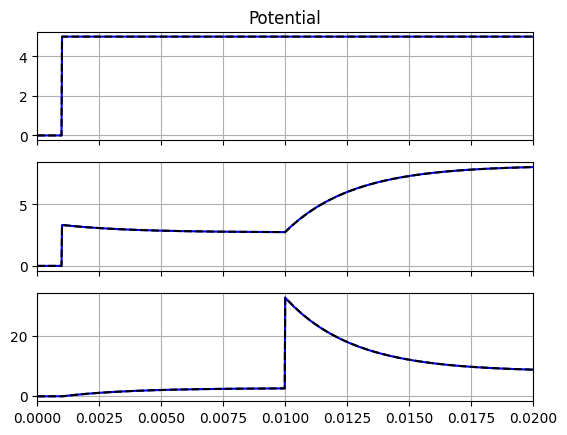

In [7]:
_, ax = plt.subplots(nrows=3, sharex=True)
ax[0].plot(*solution.get_potential('1'), 'b-')
ax[0].plot(t, phi1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Potential')

ax[1].plot(*solution.get_potential('2'), 'b-')
ax[1].plot(tout, phi2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_potential('3'), 'b-')
ax[2].plot(tout, phi3_ref, 'k--')
ax[2].grid(True)
ax[2].set_xlim((0, t_max))

(0.0, 0.02)

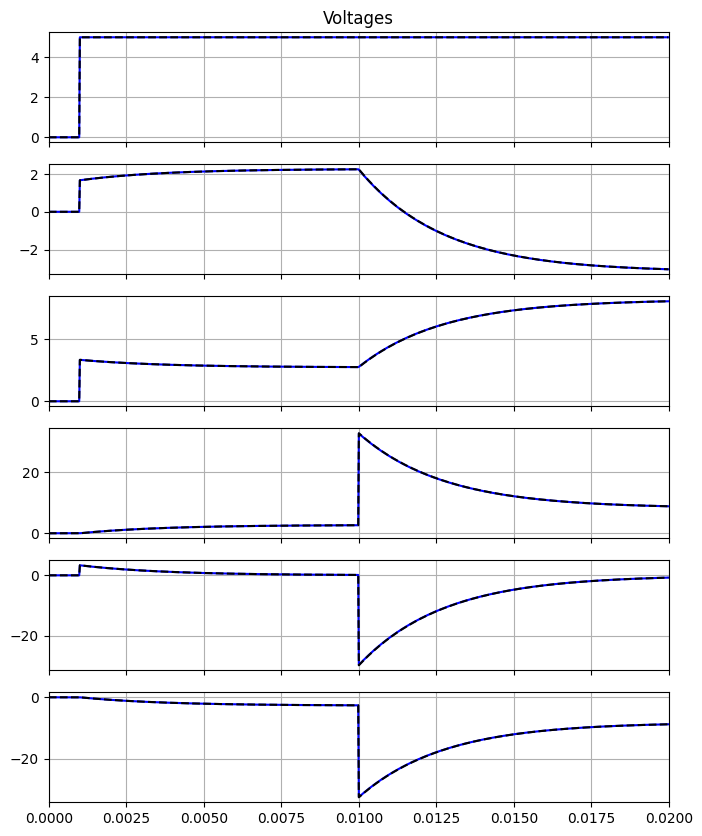

In [8]:
_, ax = plt.subplots(nrows=6, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_voltage('Vs'), 'b-')
ax[0].plot(tout, V, 'k--')
ax[0].grid(True)
ax[0].set_title('Voltages')

ax[1].plot(*solution.get_voltage('R1'), 'b-')
ax[1].plot(tout, uR1_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_voltage('R2'), 'b-')
ax[2].plot(tout, uR2_ref, 'k--')
ax[2].grid(True)

ax[3].plot(*solution.get_voltage('R3'), 'b-')
ax[3].plot(tout, uR3_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_voltage('L'), 'b-')
ax[4].plot(tout, uL_ref, 'k--')
ax[4].grid(True)

ax[5].plot(*solution.get_voltage('Is'), 'b-')
ax[5].plot(tout, uIs_ref, 'k--')
ax[5].grid(True)
ax[5].set_xlim((0, t_max))

(0.0, 0.02)

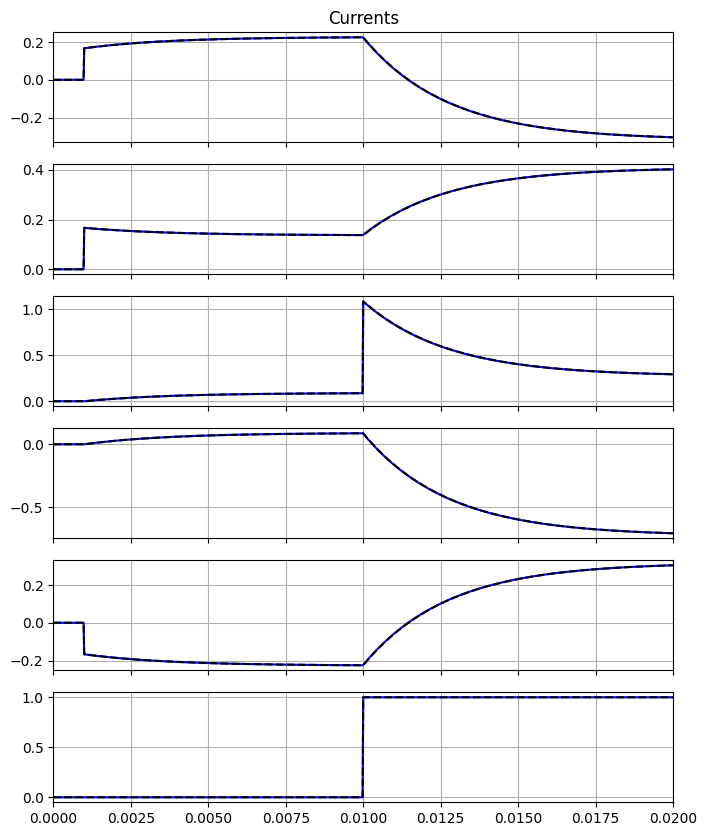

In [9]:
_, ax = plt.subplots(nrows=6, sharex=True, figsize=(8, 10))
ax[0].plot(*solution.get_current('R1'), 'b-')
ax[0].plot(tout, iR1_ref, 'k--')
ax[0].grid(True)
ax[0].set_title('Currents')

ax[1].plot(*solution.get_current('R2'), 'b-')
ax[1].plot(tout, iR2_ref, 'k--')
ax[1].grid(True)

ax[2].plot(*solution.get_current('R3'), 'b-')
ax[2].plot(tout, iR3_ref, 'k--')
ax[2].grid(True)

ax[3].plot(*solution.get_current('L'), 'b-')
ax[3].plot(tout, iL_ref, 'k--')
ax[3].grid(True)

ax[4].plot(*solution.get_current('Vs'), 'b-')
ax[4].plot(t, iS_ref, 'k--')
ax[4].grid(True)

ax[5].plot(*solution.get_current('Is'), 'b-')
ax[5].plot(tout, I, 'k--')
ax[5].grid(True)
ax[5].set_xlim((0, t_max))